In [1]:
setwd(".../output")

In [2]:
library(rrvgo)
library(gprofiler2)
library(ggvenn)




Warning message:
"package 'gprofiler2' was built under R version 4.2.3"
Warning message:
"package 'ggvenn' was built under R version 4.2.3"
Loading required package: dplyr

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: ggplot2



In [3]:
packageVersion("gprofiler2")

[1] '0.2.3'

In [4]:
library(dplyr)
library(stringr)
library(org.Hs.eg.db) 
library(AnnotationDbi)
library(EnsDb.Hsapiens.v106)
library(rlang)
library(tidyverse)
library(tibble)
library(data.table)
library(reshape2)
library(edgeR)
library(pheatmap)
library(ggplot2)
library(ggrepel )

Warning message:
"package 'stringr' was built under R version 4.2.3"
Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    

In [5]:
samples_info<-read.csv(".../0.Data/RNA_seqsamples_info.csv")

In [6]:
samples_info$group<-samples_info$group%>% str_replace("-", "_") 

In [7]:
count_matrix<-read.table(".../0.Data/RNA_seq/counts_drugs_axion/all_featurecounts.txt",header = TRUE)
count_matrix<-count_matrix[!count_matrix$Chr=="Y",]
count_matrix<-count_matrix[,c(1,7:42)]

In [8]:
head(count_matrix)

,Geneid,IPSI123.NT.09.E5_HumanL_deduplicated.bam,IPSI123.NT.09.F5_HumanL_deduplicated.bam,IPSI123.NT.10.A5_HumanL_deduplicated.bam,IPSI123.NT.10.B5_HumanL_deduplicated.bam,KdVS1.F.09.A6_HumanL_deduplicated.bam,KdVS1.F.09.B6_HumanL_deduplicated.bam,KdVS1.F.10.C8_HumanL_deduplicated.bam,KdVS1.F.10.D8_HumanL_deduplicated.bam,KdVS1.NT.09.A5_HumanL_deduplicated.bam,⋯,KdVS3.NT.10.E5_HumanL_deduplicated.bam,KdVS3.NT.10.F5_HumanL_deduplicated.bam,KdVS3.PH.09.C8_HumanL_deduplicated.bam,KdVS3.PH.09.D8_HumanL_deduplicated.bam,KdVS3.PH.10.E6_HumanL_deduplicated.bam,KdVS3.PH.10.F6_HumanL_deduplicated.bam,WTC.NT.09.E1_HumanL_deduplicated.bam,WTC.NT.09.F1_HumanL_deduplicated.bam,WTC.NT.10.A1_HumanL_deduplicated.bam,WTC.NT.10.B1_HumanL_deduplicated.bam
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000186827,3,3,0,2,2,0,3,0,1,⋯,1,0,0,1,0,0,0,0,0,0
2,ENSG00000186891,0,1,2,0,0,0,0,0,0,⋯,1,0,0,1,0,1,1,0,2,0
3,ENSG00000160072,428,405,377,487,581,508,476,504,475,⋯,353,437,308,374,387,385,298,171,232,292
4,ENSG00000260179,1,2,4,4,3,3,4,4,2,⋯,0,3,0,0,2,0,0,0,1,0
5,ENSG00000234396,0,1,0,2,0,1,1,0,1,⋯,0,0,1,2,0,1,1,0,1,0
6,ENSG00000225972,17,10,16,20,33,29,34,19,24,⋯,10,18,6,20,16,25,2,7,10,11


In [9]:
col_names<-colnames(count_matrix) %>% str_replace("X", "") %>% 
                                 str_replace("_HumanL_deduplicated.bam", "") %>% 
                                    str_replace_all ("\\.", "_") %>%
                                    str_replace_all ("_09_", "_") %>%
                                    str_replace_all ("_10_", "_")
                                  
samples_info$sample<- samples_info$sample %>% str_replace("-", "_")


In [10]:
rownames(samples_info)<-samples_info$sample

In [11]:
colnames(count_matrix)<-col_names

In [12]:
rownames(count_matrix)<-count_matrix$Geneid

In [13]:
count_matrix<-count_matrix[-1]

In [14]:
counts_pm<-cpm(count_matrix)
keep <- rowSums(counts_pm >= 2 ) >= 3
sum(keep)
count_matrix_rd<-count_matrix[keep,]

[1] 14480

In [ ]:
head(count_matrix)

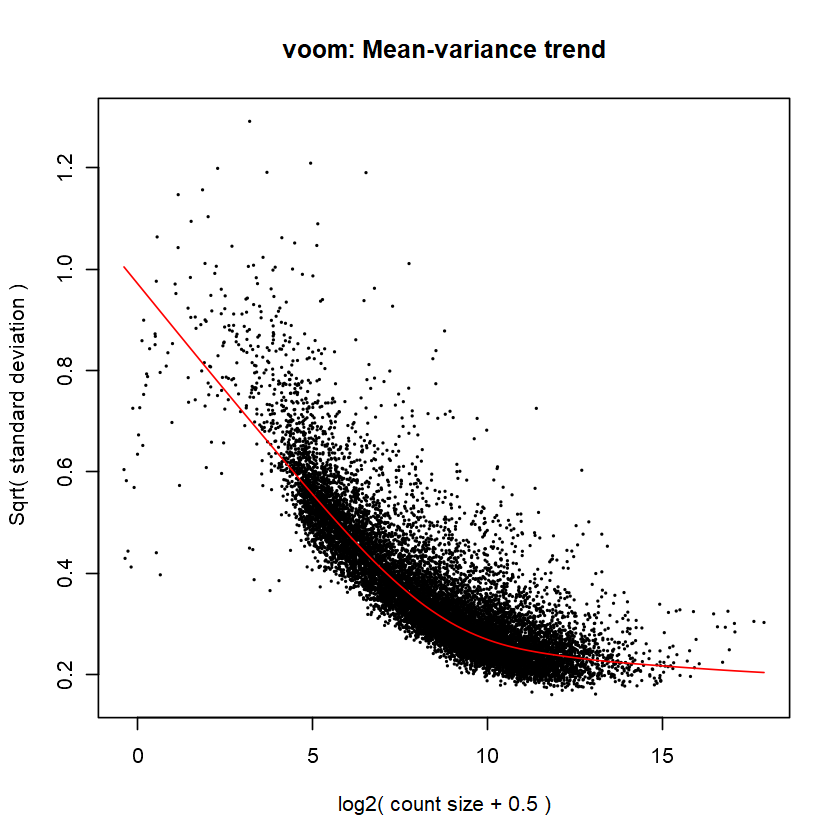

In [15]:
# Create the DGEList object with group
dge <- DGEList(count_matrix_rd, group = samples_info$group)
# Normalize counts
dge <- calcNormFactors(dge)
v <- voom(dge, plot = TRUE)

write.table(v$E,".../0.Data/counts_drugs_axion/voom_reads.txt")

In [ ]:
#plot KANSL1 expression.

In [16]:
edb <-EnsDb.Hsapiens.v106
ens<-rownames(count_matrix)
genes_ID=mapIds(edb, keys = ens, keytype="GENEID", column="GENENAME")
genes_ID=data.frame(genes_ID)
genes_ID$Geneid<-rownames(genes_ID)
colnames(genes_ID)<-c("Genename","Geneid")
head(genes_ID)

,Genename,Geneid
,<chr>,<chr>
ENSG00000186827,TNFRSF4,ENSG00000186827
ENSG00000186891,TNFRSF18,ENSG00000186891
ENSG00000160072,ATAD3B,ENSG00000160072
ENSG00000260179,,ENSG00000260179
ENSG00000234396,,ENSG00000234396
ENSG00000225972,MTND1P23,ENSG00000225972


In [17]:
voom<-v$E
voom<-as.data.frame(voom)
voom$Geneid<-rownames(voom)
voom$Genename<-genes_ID$Genename[match(voom$Geneid,genes_ID$Geneid)]

In [18]:
KANSL1<-voom[voom$Genename=="KANSL1",]
KANSL1<-melt(KANSL1)
colnames(KANSL1)<-c("Geneid","Genename","sample","value")
KANSL1<-left_join(KANSL1,samples_info,by="sample")
#head(KANSL1)
KANSL1$cell_line<-factor(KANSL1$cell_line)
KANSL1$group<-factor(KANSL1$group, levels=c("C1_NT","C4_NT",
                                           "KdVS1_NT","KdVS1_F","KdVS1_PH",
                                           "KdVS2_NT","KdVS2_PH",
                                           "KdVS3_NT","KdVS3_PH"))


Using Geneid, Genename as id variables



In [19]:
color_vector <- c('C1_NT'='#555555','C4_NT'='#555555',
                  'KdVS1_NT'='#ff6000ff' , 'KdVS1_F'='#ff6000ff','KdVS1_PH'='#ff6000ff',
                  'KdVS2_NT'='#e0122cff','KdVS2_PH'='#e0122cff',
                  'KdVS3_NT'='#b12e5bff','KdVS3_PH'='#b12e5bff')

In [20]:

# Create the design matrix
design <- model.matrix(~0+ group, data = samples_info)

# Estimate dispersion
dge <- estimateDisp(dge, design)

# Fit the model
fit <- glmQLFit(dge, design)


In [21]:
# Obtain the normalized counts
normalized_counts <- cpm(dge, normalized = TRUE)

In [ ]:
str(normalized_counts)

In [22]:
log_transformed_counts <- log2(normalized_counts + 1)

In [23]:
# Scale the data for PCA (optional)
scaled_data <- scale(t(log_transformed_counts))

# Perform PCA
pca_result <- prcomp(scaled_data, center = FALSE, scale. = FALSE)
pca_pc_metrics<-as.data.frame(pca_result$x)
pca_pc_metrics$sample<-rownames(pca_pc_metrics)
pca_pc_metrics<-inner_join(pca_pc_metrics,samples_info, by="sample")
var_explained =round((pca_result$sdev^2 / sum(pca_result$sdev^2))*100,2)

In [ ]:
ggplot(pca_pc_metrics, aes(PC1, PC2, fill=group)) +
  geom_point(size=3,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + #scale_fill_manual(values=color_vector_group)+
           theme_minimal()+
  xlab(paste0("PC1: ",var_explained[1],"%")) +
  ylab(paste0("PC2: ",var_explained[2],"%"))

In [ ]:
levels(factor(pca_pc_metrics$group))

In [24]:
group_order<-c('C1_NT','C4_NT',
               'KdVS1_NT','KdVS1_F','KdVS1_PH',
               'KdVS2_NT','KdVS2_PH',
               'KdVS3_NT','KdVS3_PH')
pca_pc_metrics$group<-factor(pca_pc_metrics$group,levels=group_order)

In [25]:
#color by drug and phenotype and shape by cell line?
color_vector <- c('C1_NT'='#555555','C4_NT'='#555555',
                  'KdVS1_NT'='#9D1B1F' , 'KdVS1_F'='#6E8B3D','KdVS1_PH'='#53868B',
                  'KdVS2_NT'='#9D1B1F','KdVS2_PH'='#53868B',
                  'KdVS3_NT'='#9D1B1F','KdVS3_PH'='#53868B')
                  
shape_vector <- c('C1_NT'=24,'C4_NT'=25,
                  'KdVS1_NT'=23 , 'KdVS1_F'=23,'KdVS1_PH'=23,
                  'KdVS2_NT'=22,'KdVS2_PH'=22,
                  'KdVS3_NT'=21,'KdVS3_PH'=21)
color_vector <- c('C1_NT'='#555555','C4_NT'='#555555',
                  'KdVS1_NT'='#ff6000ff' , 'KdVS1_F'='#ff6000ff','KdVS1_PH'='#ff6000ff',
                  'KdVS2_NT'='#e0122cff','KdVS2_PH'='#e0122cff',
                  'KdVS3_NT'='#b12e5bff','KdVS3_PH'='#b12e5bff')

In [ ]:
p<-ggplot(pca_pc_metrics, aes(PC1, PC2, fill=group,shape=group)) +
  geom_point(size=5, colour = "black", alpha = 0.6,# Specify shape and colour as fixed local parameters    
             colour = "black") + scale_fill_manual(values=color_vector) + scale_shape_manual(values=shape_vector)+
           theme_minimal()+
  xlab(paste0("PC1: ",var_explained[1],"%")) +
  ylab(paste0("PC2: ",var_explained[2],"%"))
ggsave(paste0('PCA_group.pdf'),
                  width = 5.3,   # inches
                  height = 4,
                   plot=p)# inches
p

In [ ]:
#explore degs per contrast, then look at MEAseq for the relevant variables, identify correlated genes. 
colnames(design)

In [26]:
contrasts <- makeContrasts(
    KdVS1_F=groupKdVS1_F-groupKdVS1_NT,
    KdVS1_PH=groupKdVS1_PH-groupKdVS1_NT,
    KdVS2_PH=groupKdVS2_PH-groupKdVS2_NT,
  KdVS3_PH=groupKdVS3_PH-groupKdVS3_NT,

  levels=colnames(design))
#rownames(contrasts) <- gsub("group", "", rownames(contrasts))
contrasts

,KdVS1_F,KdVS1_PH,KdVS2_PH,KdVS3_PH
groupC1_NT,0,0,0,0
groupC4_NT,0,0,0,0
groupKdVS1_F,1,0,0,0
groupKdVS1_NT,-1,-1,0,0
groupKdVS1_PH,0,1,0,0
groupKdVS2_NT,0,0,-1,0
groupKdVS2_PH,0,0,1,0
groupKdVS3_NT,0,0,0,-1
groupKdVS3_PH,0,0,0,1


In [27]:
edb <-EnsDb.Hsapiens.v106
ens<-rownames(count_matrix)
genes_ID=mapIds(edb, keys = ens, keytype="GENEID", column="GENENAME")
genes_ID=data.frame(genes_ID)
genes_ID$Geneid<-rownames(genes_ID)
colnames(genes_ID)<-c("Genename","Geneid")
head(genes_ID)
#all<-count_matrix$Genename

,Genename,Geneid
,<chr>,<chr>
ENSG00000186827,TNFRSF4,ENSG00000186827
ENSG00000186891,TNFRSF18,ENSG00000186891
ENSG00000160072,ATAD3B,ENSG00000160072
ENSG00000260179,,ENSG00000260179
ENSG00000234396,,ENSG00000234396
ENSG00000225972,MTND1P23,ENSG00000225972


In [ ]:
head(KdVS1_F)

In [28]:
# Perform the tests
qlf <- glmQLFTest(fit, contrast = contrasts[, "KdVS1_F"])
KdVS1_F <- topTags(qlf, n = Inf)$table

qlf <- glmQLFTest(fit, contrast = contrasts[, "KdVS1_PH"])
KdVS1_PH <- topTags(qlf, n = Inf)$table

qlf <- glmQLFTest(fit, contrast = contrasts[, "KdVS2_PH"])
KdVS2_PH <- topTags(qlf, n = Inf)$table

qlf <- glmQLFTest(fit, contrast = contrasts[, "KdVS3_PH"])
KdVS3_PH <- topTags(qlf, n = Inf)$table


KdVS1_F<- KdVS1_F %>% data.frame %>%
  mutate(KdVS1_F = ifelse(FDR < 0.05 & logFC > 0, "Up", 
                     ifelse(FDR < 0.05 & logFC < 0, "Down", "No")))%>%
                      arrange(desc(logFC > 0), desc(logFC))
KdVS1_F$gene<-rownames(KdVS1_F)
KdVS1_F <- KdVS1_F %>%
  mutate(Genename = genes_ID$Genename[match(gene, genes_ID$Geneid)])
write.csv(KdVS1_F,"KdVS1_F.csv")

KdVS1_PH<- KdVS1_PH %>% data.frame %>%
  mutate(KdVS1_PH = ifelse(FDR < 0.05 & logFC > 0, "Up", 
                     ifelse(FDR < 0.05 & logFC < 0, "Down", "No")))%>%
                      arrange(desc(logFC > 0), desc(logFC))
KdVS1_PH$gene<-rownames(KdVS1_PH)
KdVS1_PH <- KdVS1_PH %>%
  mutate(Genename = genes_ID$Genename[match(gene, genes_ID$Geneid)])
write.csv(KdVS1_PH,"KdVS1_PH.csv")

KdVS2_PH<- KdVS2_PH %>% data.frame %>%
  mutate(KdVS2_PH = ifelse(FDR < 0.05 & logFC > 0, "Up", 
                     ifelse(FDR < 0.05 & logFC < 0, "Down", "No")))%>%
                      arrange(desc(logFC > 0), desc(logFC))
KdVS2_PH$gene<-rownames(KdVS2_PH)
KdVS2_PH <- KdVS2_PH %>%
  mutate(Genename = genes_ID$Genename[match(gene, genes_ID$Geneid)])
write.csv(KdVS2_PH,"KdVS2_PH.csv")

KdVS3_PH<- KdVS3_PH %>% data.frame %>%
  mutate(KdVS3_PH = ifelse(FDR < 0.05 & logFC > 0, "Up", 
                     ifelse(FDR < 0.05 & logFC < 0, "Down", "No")))%>%
                      arrange(desc(logFC > 0), desc(logFC))
KdVS3_PH$gene<-rownames(KdVS3_PH)
KdVS3_PH <- KdVS3_PH %>%
  mutate(Genename = genes_ID$Genename[match(gene, genes_ID$Geneid)])
write.csv(KdVS3_PH,"KdVS3_PH.csv")


In [ ]:
KdVS1_PH[KdVS1_F$Genename =="CLCN4",]

In [ ]:
df <- df[df[[6]] != "No.", ]

In [29]:
#CLCN4 is not changed by adding the drugs.Not even when NB was increased...
#mitochondrila genes, lysosomal genes?? Maybe generla GO enrichment first? and then look deeper?
all_comparisons<-list(KdVS1_F=KdVS1_F,KdVS1_PH=KdVS1_PH,KdVS2_PH=KdVS2_PH,KdVS3_PH=KdVS3_PH)
all_comparisons_split<-list(KdVS1_F_up=KdVS1_F[KdVS1_F$KdVS1_F=="Up",],KdVS1_F_down=KdVS1_F[KdVS1_F$KdVS1_F=="Down",],
                            KdVS1_PH_up=KdVS1_PH[KdVS1_PH$KdVS1_PH=="Up",],KdVS1_PH_down=KdVS1_PH[KdVS1_PH$KdVS1_PH=="Down",],
                            KdVS2_PH_up=KdVS2_PH[KdVS2_PH$KdVS2_PH=="Up",],KdVS2_PH_down=KdVS2_PH[KdVS2_PH$KdVS2_PH=="Down",],
                            KdVS3_PH_up=KdVS3_PH[KdVS3_PH$KdVS3_PH=="Up",],KdVS3_PH_down=KdVS3_PH[KdVS3_PH$KdVS3_PH=="Down",])
#all_comparisons

In [ ]:
setwd('.../output/enrichment')

In [ ]:
GO_cat<-c("GO:BP","GO:MF","GO:CC")
no_red<-c("KEGG","REAC","WP","TF","MIRNA","HPA","HP")
categories<-c(no_red,GO_cat)

In [ ]:
reduced_modules_l<-list()
#categories<-c("GO:MF")
for (module in names(all_comparisons_split)){
        print(module)
        marker_module= all_comparisons_split[[module]]#$gene# genes_in_sginificant_modules[genes_in_sginificant_modules$module==module,"gene"]
        
        marker_module <- marker_module[marker_module[[6]] != "No", "gene"]
        reducedTerms_all_cat<-list()
         for (category in categories){
                        print(category)
                        category_w<-gsub("\\:", "", category)
                        category_w<-gsub("GO", "", category_w)
                        categ<-c(paste0(category))
                        gostres <- gost(query =marker_module , 
                        organism = "hsapiens", ordered_query = FALSE, 
                        multi_query = FALSE, significant = TRUE, exclude_iea = FALSE, 
                        measure_underrepresentation = FALSE, evcodes = TRUE, 
                        user_threshold = 0.05, correction_method = "g_SCS", 
                        domain_scope = "annotated", custom_bg = NULL, 
                        numeric_ns = "", sources = categ, as_short_link = FALSE)
            
            if(is.null(gostres$result)){
                print("no term")
            }
            else {
                df=list()
                p_val=c()
                result=gostres$result
                result=result[, c("term_name","p_value", "source","term_id","intersection_size","query_size","term_size","intersection")]
                result$neg_log_p=-log10(result$p_value)
                result= result %>%arrange(desc(neg_log_p))
                go_terms<-result
                len<-length(go_terms$term_name)
                
               if(len==1 || category %in% no_red ){
               
                if(len==1){print("only one")}
                if(category %in% no_red){print(paste0("cat is ",category))}
                Terms<-go_terms
                #names<-c('go','module','parent','parentSimScore','score','size','term','parentTerm')
                #template = as.data.frame(matrix(numeric(),nrow = 0, ncol = length(names)))
                #colnames(template) = names
                template <- data.frame(matrix(ncol = 1, nrow =length(Terms$term_name)))


                template$go<-Terms$term_id
                #template$module<-module
                template$parent<-Terms$term_id
                #template$parentSimScore<-1
                template$score<-Terms$neg_log_p
                template$size<-Terms$intersection_size
                template$term<-Terms$term_name
                template$parentTerm<-Terms$term_name
                template$source<-category
                template$module<-module
                template$intersection<-Terms$intersection
                b<-length(template)
                template<-template[2:b]
                reducedTerms<-template
                write.csv(reducedTerms,paste0("go_reduced_",module,"_",category_w,".csv"))
     
             
                }else{#reduce
                    go<-go_terms
                    length(go$term_name)
                    simMatrix <- calculateSimMatrix(go$term_id,
                                            orgdb="org.Hs.eg.db",
                                            ont=c(category_w),
                                            method="Rel")
                    name_scores<-go$term_id
                    scores<-go$neg_log_p
                    names(scores)<-name_scores

                    reducedTerms <- reduceSimMatrix(simMatrix,
                                            scores,
                                            threshold=0.7,
                                            orgdb="org.Hs.eg.db")

                    reducedTerms$size<-go$intersection_size[match(reducedTerms$term, go$term_name)]
                    reducedTerms$source<-category
                   reducedTerms$module<-module
                   reducedTerms$intersection<-go$intersection[match(reducedTerms$term, go$term_name)]
                   reducedTerms<-reducedTerms[,!colnames(reducedTerms) %in% c("cluster","parentSimScore")]
                    write.csv(reducedTerms,paste0("go_reduced_",module,"_",category_w,".csv"))
                   }

                   reducedTerms_all_cat[[category]]<-reducedTerms

                   
         }
             
            # reducedTerms_all_cat[[category]]<-reducedTerms


    }
    reducedTerms_all_cat<-do.call(rbind,reducedTerms_all_cat)
    reduced_modules_l[[module]]<-reducedTerms_all_cat
    
    
 }
reduced_modules_l<-do.call(rbind,reduced_modules_l)
write.csv(reduced_modules_l,"All_modules_all_categories_enrichment_include_all_modules_split.csv")
reduced_modules_l_rm<-reduced_modules_l %>% group_by(module, source) %>% distinct(parentTerm, .keep_all= TRUE)
write.csv(reduced_modules_l_rm,"GO_reduced/All_modules_all_categories_enrichment_reduced_include_all_modules_split.csv")

In [ ]:
reduced_modules_l_rm<-read.csv("GO_reduced/All_modules_all_categories_enrichment_reduced_include_all_modules_split.csv")
reduced_modules_l_rm<-reduced_modules_l_rm[-1]
head(reduced_modules_l_rm)

In [ ]:
#now splitting in up and down? or maybe do this for the correlations?
#do it for chcking

In [ ]:
#visualize split, how to color it?
#shape by cell line, if up or down based on alpha or not, so fill intensity?
func_cat<-c("GO:MF","GO:BP","GO:CC","WP","REAC")#"GO:BP","HP",
#top5? check
reduced_modules_l_rm$line<- sub("_[^_]*$", "", reduced_modules_l_rm$module)
reduced_modules_l_rm$direction<-  sub(".*_", "", reduced_modules_l_rm$module)
reduced_modules_l_rm$alpha_val <- ifelse(reduced_modules_l_rm$direction == "up", 1, 0.4)


In [ ]:
reduced_modules_l_rm_func<-reduced_modules_l_rm[reduced_modules_l_rm$source %in% func_cat,]
reduced_modules_l_rm_func<-droplevels(reduced_modules_l_rm_func)
reduced_modules_l_rm_func$module<-factor(reduced_modules_l_rm_func$module)
reduced_modules_l_rm_func$term<-factor(reduced_modules_l_rm_func$term)
#levels(reduced_modules_l_rm_func$module)
reduced_modules_l_rm_func_red<- reduced_modules_l_rm_func %>% group_by(module, source) %>%
  arrange(desc(score)) %>% 
   top_n(3, score) 

In [ ]:
colnames(reduced_modules_l_rm_func_red)

In [ ]:
reduced_modules_l_rm_func_red<-with(reduced_modules_l_rm_func_red, reduced_modules_l_rm_func_red[order( module,source, -score),])
reduced_modules_l_rm_func_red$term<-factor(reduced_modules_l_rm_func_red$term, levels=unique(reduced_modules_l_rm_func_red$term))
reduced_modules_l_rm_func_red<-droplevels(reduced_modules_l_rm_func_red)

reduced_modules_l_rm_func_red<-reduced_modules_l_rm_func_red %>% mutate(func_cat_col_y = case_when(
    
                               source ==  "GO:BP" ~ "#8B8682",
                               source ==  "GO:MF" ~ "#36648B",
                               source ==  "GO:CC" ~ "#8B2252",
                               source ==  "WP" ~ "#8B8B00",
                               source ==  "REAC" ~ "#698B69",))
func_cat_col_y<-reduced_modules_l_rm_func_red[!duplicated(reduced_modules_l_rm_func_red$term),]$func_cat_col_y

In [ ]:
max_gene<-max(reduced_modules_l_rm_func_red$size)
min_gene<-min(reduced_modules_l_rm_func_red$size)
av_gene=ceiling((max_gene+min_gene)/2)

In [ ]:
max_gene

In [ ]:
shape_vector <- c('C1_NT'=24,'C4_NT'=25,
                  'KdVS1_NT'=23 , 'KdVS1_F'=22,'KdVS1_PH'=21,
                  'KdVS2_NT'=23,'KdVS2_PH'=21,
                  'KdVS3_NT'=23,'KdVS3_PH'=21)

In [ ]:
# Plot
p <- ggplot(reduced_modules_l_rm_func_red,
            aes(x = score, y = term,
                size = size,
                fill = line,     # base color by line
                shape = line,    # shape by line
                alpha = alpha_val)) +  # transparency by up/down
  geom_point(color = "black", stroke = 0.5) +
  
  # Custom scales
  scale_shape_manual(values = shape_vector) +
  scale_fill_manual(values = color_vector) +
  scale_alpha_identity() +   # use the alpha_val directly
  scale_radius(limits = c(min_gene, max_gene),
               breaks = c(min_gene, av_gene, max_gene),
               range = c(5, 10)) +
  
  theme_minimal() +
  theme(axis.text.y = element_text(colour = func_cat_col_y, size=14),
        axis.text.x = element_text(size=14, color="black"),
        axis.title  = element_text(size=14),
        text        = element_text(size=14)) +
  ylab("")
ggsave(paste0('GO_top3.pdf'),
                  width =11,   # inches
                  height = 7,
                   plot=p)# inches
p

In [ ]:
head(KdVS1_F)

In [30]:
#ven driagam of up and down genes first.use the same color bur show the name, always alpha. 
DEGs_up<-list(KdVS1_F=KdVS1_F[KdVS1_F$KdVS1_F=="Up","gene"],
                            KdVS1_PH=KdVS1_PH[KdVS1_PH$KdVS1_PH=="Up","gene"],
                            KdVS2_PH=KdVS2_PH[KdVS2_PH$KdVS2_PH=="Up","gene"],
                            KdVS3_PH=KdVS3_PH[KdVS3_PH$KdVS3_PH=="Up","gene"])
DEGs_down<-list(KdVS1_F=KdVS1_F[KdVS1_F$KdVS1_F=="Down","gene"],
               KdVS1_PH=KdVS1_PH[KdVS1_PH$KdVS1_PH=="Down","gene"],
               KdVS2_PH=KdVS2_PH[KdVS2_PH$KdVS2_PH=="Down","gene"],
               KdVS3_PH=KdVS3_PH[KdVS3_PH$KdVS3_PH=="Down","gene"])

In [31]:
str(DEGs_up)

List of 4
 $ KdVS1_F : chr [1:171] "ENSG00000225953" "ENSG00000152137" "ENSG00000189184" "ENSG00000134548" ...
 $ KdVS1_PH: chr [1:45] "ENSG00000145721" "ENSG00000134548" "ENSG00000114204" "ENSG00000285294" ...
 $ KdVS2_PH: chr [1:625] "ENSG00000159399" "ENSG00000141526" "ENSG00000113739" "ENSG00000214548" ...
 $ KdVS3_PH: chr [1:18] "ENSG00000225953" "ENSG00000145685" "ENSG00000159167" "ENSG00000196542" ...


In [33]:
common_up<-Reduce(intersect, DEGs_up)

In [35]:
genes_ID[common_up,]

,Genename,Geneid
,<chr>,<chr>
ENSG00000159167,STC1,ENSG00000159167
ENSG00000145685,LHFPL2,ENSG00000145685
ENSG00000135824,RGS8,ENSG00000135824


In [ ]:
color_vector <- c('C1_NT'='#555555','C4_NT'='#555555',
                  'KdVS1_NT'='#9D1B1F' , 'KdVS1_F'='#6E8B3D','KdVS1_PH'='#53868B',
                  'KdVS2_NT'='#9D1B1F','KdVS2_PH'='#53868B',
                  'KdVS3_NT'='#9D1B1F','KdVS3_PH'='#53868B')

In [ ]:
color_vector <- c('C1_NT'='#555555','C4_NT'='#555555',
                  'KdVS1_NT'='#ff6000ff' , 'KdVS1_F'='#ff6000ff','KdVS1_PH'='#ff6000ff',
                  'KdVS2_NT'='#e0122cff','KdVS2_PH'='#e0122cff',
                  'KdVS3_NT'='#b12e5bff','KdVS3_PH'='#b12e5bff')

In [ ]:
p<-ggvenn(DEGs_up,
       fill_color = c("#ff6000ff", "#ff6000ff", "#e0122cff","#b12e5bff"), 
       stroke_size = 0.5, set_name_size = 5,
        show_percentage = TRUE   ) + ggtitle("Up regulated genes") +theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
ggsave("Venn_up_tratment.pdf", bg = "transparent",
                  width = 6.5, # inches
                  height = 5,
                   plot=p# inches
)
p

In [ ]:
p<-ggvenn(DEGs_down,
       fill_color = c("#ff6000ff", "#ff6000ff", "#e0122cff","#b12e5bff"), 
       stroke_size = 0.5, set_name_size = 5,
        show_percentage = TRUE   ) + ggtitle("Down regulated genes") +theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
ggsave("Venn_down_tratment.pdf", bg = "transparent",
                  width = 6.5, # inches
                  height = 5,
                   plot=p# inches
)
p

In [ ]:
#then same for GO terms. then, look at KdVS vs controls in this xontext. Ultimately, maybe measeq of shared GO? Yes
GO_up<-reduced_modules_l_rm_func[reduced_modules_l_rm_func$direction=="up",]
GO_up<-split(GO_up, GO_up$line)
GO_up_v <- lapply(GO_up, function(df) df$parentTerm)


In [ ]:
#then same for GO terms. then, look at KdVS vs controls in this xontext. Ultimately, maybe measeq of shared GO? Yes
GO_down<-reduced_modules_l_rm_func[reduced_modules_l_rm_func$direction=="down",]
GO_down<-split(GO_down, GO_down$line)
GO_down_v <- lapply(GO_down, function(df) df$parentTerm)

In [ ]:
p<-ggvenn(GO_up_v,
       fill_color = c("#6E8B3D", "#53868B", "#53868B","#53868B"), 
       stroke_size = 0.5, set_name_size = 5,
        show_percentage = TRUE   ) + ggtitle("Up regulated terms") +theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
ggsave("Venn_up_GO.pdf", bg = "transparent",
                  width = 6.5, # inches
                  height = 5,
                   plot=p# inches
)
p

In [ ]:
# Assuming GO_up_v is a named list of vectors
Reduce(intersect, GO_up_v)

In [ ]:
p<-ggvenn(GO_down_v,
       fill_color = c("#53868B", "#53868B", "#53868B","#53868B"), 
       stroke_size = 0.5, set_name_size = 5,
        show_percentage = TRUE   ) + ggtitle("Down regulated terms") +theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
ggsave("Venn_down_GO.pdf", bg = "transparent",
                  width = 6.5, # inches
                  height = 5,
                   plot=p# inches
)
p

In [ ]:
#MEa seq for gene is neuron projection? show shape by KdVS or control?